# Titanic Survival Prediction
#### Replace all 'None' with your code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("gender_submission.csv")
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
#lr = 0.1 #learning rate

In [3]:
#We need to change the NaN value to 0
train_df=train_df.fillna(0)
test_df=test_df.fillna(0)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [6]:
#Certain Parameters requires the creation of dummy values
train_df_sex = pd.get_dummies(train_df['Sex'])
train_df_new = pd.concat([train_df, train_df_sex], axis=1)
train_df_new = train_df_new.drop('Sex', axis=1)

train_df_emb = pd.get_dummies(train_df_new['Embarked'])
train_df_new = pd.concat([train_df_new, train_df_emb], axis=1)
train_df_new = train_df_new.drop('Embarked', axis=1)

train_df_new = train_df_new.drop('Ticket', axis=1)
train_df_new = train_df_new.drop('Name', axis=1)
train_df_new = train_df_new.drop('Cabin', axis=1)
train_df_new = train_df_new.drop('PassengerId',axis=1)

In [7]:
#Normalizing the data set
fl = (train_df_new-train_df_new.mean())/(train_df_new.max()-train_df_new.min()) 
features = fl.drop('Survived', axis=1)
targets = train_df_new.iloc[:,0:1]


In [8]:
train_df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,0,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [9]:
fl.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,0,C,Q,S
0,-0.383838,0.345679,-0.022491,0.059624,-0.063599,-0.048707,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
1,0.616162,-0.654321,0.177509,0.059624,-0.063599,0.076277,0.647587,-0.647587,-0.002245,0.811448,-0.08642,-0.722783
2,0.616162,0.345679,0.027509,-0.065376,-0.063599,-0.047390,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
3,0.616162,-0.654321,0.140009,0.059624,-0.063599,0.040786,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
4,-0.383838,0.345679,0.140009,-0.065376,-0.063599,-0.047146,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217


In [10]:
fl.shape

(891, 12)

In [11]:
#Convert features and targets to numpy arrays
### Start Code here

features=np.array(fl[['Pclass','Age','SibSp','Parch','Fare','female','male',0,'C','Q','S']])
targets=np.array(fl['Survived'])
### End Code here
wts = np.ones([11,1]) #weights

In [12]:
wts.shape

(11, 1)

In [13]:
features.shape

(891, 11)

In [14]:
targets=targets.reshape(891,1)

In [15]:
def sigmoid(features,weights):
    z=np.dot(features,weights)
    sig= 1/(1+np.exp(-z))
    return sig

In [16]:
def propagate(features, targets, weights):
    N = len(targets)
    ### Start Code here
    pred = sigmoid(features,weights)
    loss = ((-targets*np.log(pred))-((1-targets)*np.log(1-pred)))
    error= (1/N)*np.sum(loss)
    ### End code here
    return error

In [17]:
def update(features, targets, weights, lr):
    
    N = len(features)
    ### Start Code here
    pred = sigmoid(features,weights)
    

    grad =(1/N)*(np.dot(features.T,(pred-targets)))
    
    weights=weights-(lr*grad)
    print(weights)
    ### End Code here
    
    return weights

In [18]:
def train(features,targets, weights, lr, iters):
    cost_dict = []

    for i in range(iters):
        weights = update(features,targets, weights, lr)
        cost = propagate(features,targets, weights)
        cost_dict.append(cost)    
    return (cost_dict,weights)

In [19]:
lr=0.01
iters=1000

In [20]:
costs,wts = train(features,targets, wts, lr, iters)

[[0.99901242]
 [0.99998558]
 [0.99991181]
 [0.99998891]
 [1.00013382]
 [1.00125846]
 [0.99874154]
 [1.00001583]
 [1.0003989 ]
 [0.99999565]
 [0.99958963]]
[[0.99802547]
 [0.99997111]
 [0.99982358]
 [0.99997774]
 [1.00026752]
 [1.00251544]
 [0.99748456]
 [1.00003164]
 [1.00079733]
 [0.99999125]
 [0.99917978]]
[[0.99703915]
 [0.99995658]
 [0.99973533]
 [0.99996648]
 [1.0004011 ]
 [1.00377093]
 [0.99622907]
 [1.00004744]
 [1.00119529]
 [0.99998681]
 [0.99877046]]
[[0.99605346]
 [0.999942  ]
 [0.99964705]
 [0.99995513]
 [1.00053455]
 [1.00502495]
 [0.99497505]
 [1.00006323]
 [1.00159278]
 [0.99998232]
 [0.99836167]]
[[0.99506841]
 [0.99992737]
 [0.99955874]
 [0.9999437 ]
 [1.00066788]
 [1.00627749]
 [0.99372251]
 [1.000079  ]
 [1.00198981]
 [0.99997778]
 [0.99795341]]
[[0.99408399]
 [0.99991269]
 [0.9994704 ]
 [0.99993217]
 [1.00080109]
 [1.00752855]
 [0.99247145]
 [1.00009476]
 [1.00238637]
 [0.9999732 ]
 [0.99754568]]
[[0.9931002 ]
 [0.99989795]
 [0.99938203]
 [0.99992056]
 [1.00093417]


[[0.68106276]
 [0.9916747 ]
 [0.96672388]
 [0.99130364]
 [1.04118779]
 [1.37063743]
 [0.62936257]
 [1.00491971]
 [1.117134  ]
 [0.99611573]
 [0.88183056]]
[[0.68027938]
 [0.99164409]
 [0.96662949]
 [0.99126913]
 [1.04128389]
 [1.37145782]
 [0.62854218]
 [1.00493132]
 [1.11739186]
 [0.99610031]
 [0.88157651]]
[[0.67949649]
 [0.99161345]
 [0.96653509]
 [0.99123457]
 [1.0413799 ]
 [1.37227725]
 [0.62772275]
 [1.00494292]
 [1.11764941]
 [0.99608488]
 [0.88132279]]
[[0.67871407]
 [0.99158277]
 [0.96644069]
 [0.99119997]
 [1.04147583]
 [1.37309573]
 [0.62690427]
 [1.00495451]
 [1.11790666]
 [0.99606942]
 [0.8810694 ]]
[[0.67793213]
 [0.99155205]
 [0.96634627]
 [0.99116531]
 [1.04157168]
 [1.37391326]
 [0.62608674]
 [1.00496609]
 [1.1181636 ]
 [0.99605395]
 [0.88081635]]
[[0.67715068]
 [0.9915213 ]
 [0.96625185]
 [0.99113062]
 [1.04166744]
 [1.37472984]
 [0.62527016]
 [1.00497766]
 [1.11842024]
 [0.99603847]
 [0.88056363]]
[[0.6763697 ]
 [0.99149051]
 [0.96615742]
 [0.99109588]
 [1.04176312]


[[0.46827851]
 [0.9811938 ]
 [0.93857216]
 [0.97938485]
 [1.06638689]
 [1.57687277]
 [0.42312723]
 [1.00799534]
 [1.1817334 ]
 [0.99096773]
 [0.81930353]]
[[0.46761843]
 [0.98115407]
 [0.9384767 ]
 [0.9793397 ]
 [1.06646228]
 [1.57746048]
 [0.42253952]
 [1.00800466]
 [1.18191694]
 [0.99094893]
 [0.81912947]]
[[0.4669587 ]
 [0.9811143 ]
 [0.93838124]
 [0.97929451]
 [1.0665376 ]
 [1.57804755]
 [0.42195245]
 [1.00801397]
 [1.18210029]
 [0.99093012]
 [0.81895562]]
[[0.46629933]
 [0.98107451]
 [0.93828578]
 [0.9792493 ]
 [1.06661287]
 [1.57863398]
 [0.42136602]
 [1.00802328]
 [1.18228344]
 [0.9909113 ]
 [0.81878199]]
[[0.46564032]
 [0.98103469]
 [0.93819033]
 [0.97920406]
 [1.06668808]
 [1.57921978]
 [0.42078022]
 [1.00803257]
 [1.18246638]
 [0.99089247]
 [0.81860857]]
[[0.46498167]
 [0.98099485]
 [0.93809487]
 [0.9791588 ]
 [1.06676324]
 [1.57980494]
 [0.42019506]
 [1.00804187]
 [1.18264912]
 [0.99087364]
 [0.81843537]]
[[0.46432337]
 [0.98095498]
 [0.93799941]
 [0.9791135 ]
 [1.06683833]


In [21]:
len(wts)

11

In [22]:
wts

array([[0.26123425],
       [0.96622596],
       [0.90599824],
       [0.96259102],
       [1.08921391],
       [1.74552353],
       [0.25447647],
       [1.01086684],
       [1.23434528],
       [0.98433662],
       [0.77045127]])

In [23]:
pred=sigmoid(features, wts)

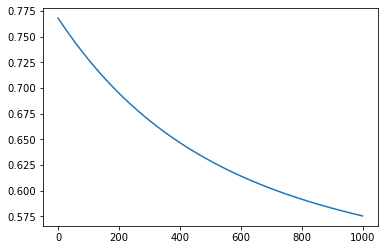

In [24]:
j = [i for i in range(iters)]
plt.plot(j,costs)

In [25]:
len(j)

1000

In [26]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(targets -pred)) * 100))

train accuracy: 44.456729615545434 %


In [27]:
test_df_sex = pd.get_dummies(test_df['Sex'])
test_df_new = pd.concat([test_df, test_df_sex], axis=1)
test_df_new = test_df_new.drop('Sex', axis=1)

test_df_emb = pd.get_dummies(test_df_new['Embarked'])
test_df_new = pd.concat([test_df_new, test_df_emb], axis=1)
test_df_new = test_df_new.drop('Embarked', axis=1)

test_df_new = test_df_new.drop('Ticket', axis=1)
test_df_new = test_df_new.drop('Name', axis=1)
test_df_new =test_df_new.drop('Cabin', axis=1)
test_df_new = test_df_new.drop('PassengerId',axis=1)
test_feat=test_df_new

emb_zeros = np.zeros([418,1])
test_feat['0']=emb_zeros
test_feat=test_feat[['Pclass','Age','SibSp','Parch','Fare','female','male','0','C','Q','S']]


test_targets=df.drop('PassengerId',axis=1)

In [28]:
fin = (test_feat-test_feat.mean())/(test_feat.max()-test_feat.min())

In [29]:
test_feat=np.array(test_feat)
test_targets=np.array(test_targets)

In [30]:
pred_test=sigmoid(test_feat, wts)

In [31]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(pred_test - test_targets)) * 100))

test accuracy: 36.41575437711061 %
